In [4]:
import numpy as np
import matplotlib.pyplot as plt
from est_MI import est_MI_JVHW, est_MI_MLE
from test_entro import entropy_true, validate_dist, randsmpl
%matplotlib inline

def MI_true(pxy):
    """computes mutual information I(X;Y) given the joint distribution

    Input:
    ----- pxy: Sx-by-Sy matrix capturing the joint probability masses of the
               the bivariate RVs (X,Y), where Sx and Sy are the support size
               of X and Y, respectively. The (i,j)-th entry of pxy denotes
               the joint probability Pr(X = i,Y = j).

    Output:
    ----- MI: the mutual information I(X;Y), which is a scaler.
    """
    flat_pxy = pxy.flatten()
    validate_dist(flat_pxy)

    px = pxy.sum(axis=0)
    py = pxy.sum(axis=1)

    return entropy_true(px) + entropy_true(py) - entropy_true(flat_pxy)

S = 100
S = 110
S = 122
S = 135
S = 149
S = 164
S = 181
S = 200


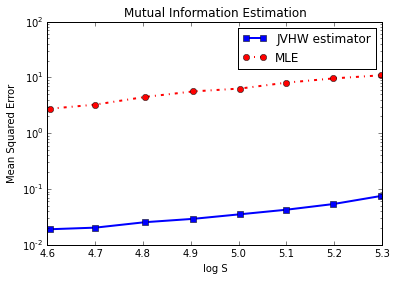

In [12]:
num = 8
mc_times = 300  # The number of Monte-Carlo trials for each single S
record_S = np.round(np.logspace(2, np.log10(200), num))
n = 2500  # The operating regime is: S << n << S^2
true_S = np.zeros(num)
JVHW_S = np.zeros(num)
MLE_S = np.zeros(num)
for i in range(num):
    S = int(record_S[i])
    print("S = {0}".format(S))

    px = np.random.beta(0.6, 0.5, S)
    px /= px.sum()
    pz = np.random.beta(0.6, 0.5, S)
    pz /= pz.sum()

    py_cond_x = pz[None, ...].repeat(S, axis=0)
    for row in range(int(S)):
        py_cond_x[row] = np.roll(py_cond_x[row], row)

    pxy = np.diag(px).dot(py_cond_x)
    X, Y = np.unravel_index(randsmpl(pxy.flatten(), n, mc_times) - 1, (S, S))
    # Note that X and Y are integer arrays of dimension (# of samples, # of parallel estimation tasks)
    true_S[i] = MI_true(pxy)

    record_JVHW = est_MI_JVHW(X, Y)
    record_MLE = est_MI_MLE(X, Y)

    JVHW_S[i] = np.mean((record_JVHW - true_S[i])**2)
    MLE_S[i] = np.mean((record_MLE - true_S[i])**2)

plt.semilogy(np.log(record_S), JVHW_S, 'b-s', linewidth=2, markerfacecolor='b')
plt.semilogy(np.log(record_S), MLE_S, 'r-.o', linewidth=2, markerfacecolor='r')
plt.legend(['JVHW estimator','MLE'])
plt.xlabel('log S')
plt.ylabel('Mean Squared Error')
plt.title('Mutual Information Estimation')
plt.show()